In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
census_geo = gpd.read_file('../data/census_income.geojson')

In [4]:
print(census_geo.crs)
census_geo.head()

EPSG:4326


,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,04000US47,Tennessee,2713635.0,7405.0,144639.0,2807.0,122212.0,3595.0,111419.0,2673.0,...,4514.0,257232.0,4293.0,169567.0,3100.0,182209.0,3522.0,197980.0,3847.0,"MULTIPOLYGON (((-83.98762 36.58947, -83.98724 ..."
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,225.0,156.0,90.0,74.0,52.0,41.0,42.0,...,53.0,125.0,79.0,16.0,18.0,46.0,33.0,11.0,16.0,"MULTIPOLYGON (((-84.32016 35.99186, -84.32008 ..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,160.0,93.0,73.0,28.0,35.0,26.0,30.0,...,73.0,242.0,94.0,195.0,114.0,256.0,81.0,368.0,140.0,"MULTIPOLYGON (((-84.24333 36.00161, -84.24330 ..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,235.0,127.0,159.0,126.0,7.0,13.0,...,97.0,134.0,77.0,129.0,106.0,295.0,146.0,122.0,67.0,"MULTIPOLYGON (((-84.25132 36.00539, -84.25124 ..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,154.0,25.0,26.0,95.0,59.0,56.0,36.0,...,85.0,174.0,70.0,106.0,61.0,93.0,59.0,43.0,38.0,"MULTIPOLYGON (((-84.24401 36.04229, -84.24090 ..."


In [5]:
census_df = pd.read_csv('../data/census_df_updated_0225.csv')

In [6]:
census_df.head()

,geoid,tract_number,name,county,county_and_state,total,less_than_10k,10k_to_14.999k,15k_to_19.999k,20k_to_24.999k,...,35k_to_39.999k,40k_to_44.999k,45k_to_49.999k,50k_to_59.999k,60k_to_74.999k,75k_to_99.999k,100k_to_124.999k,125k_to149.999k,150k_to_199.999k,200k_or_more
0,14000US47001020100,47001020100,Census Tract 201,Anderson,"Anderson, Tennessee",1531,156,74,41,50,...,262,154,52,168,138,101,125,16,46,11
1,14000US47001020201,47001020201,Census Tract 202.01,Anderson,"Anderson, Tennessee",2029,93,28,26,74,...,54,89,86,151,219,124,242,195,256,368
2,14000US47001020202,47001020202,Census Tract 202.02,Anderson,"Anderson, Tennessee",1951,235,159,7,13,...,40,33,140,74,257,164,134,129,295,122
3,14000US47001020300,47001020300,Census Tract 203,Anderson,"Anderson, Tennessee",1567,25,95,56,30,...,74,46,53,173,170,280,174,106,93,43
4,14000US47001020400,47001020400,Census Tract 204,Anderson,"Anderson, Tennessee",1812,104,59,88,40,...,117,61,90,142,370,295,120,56,127,62


In [7]:
shapefile = gpd.read_file('../shape_census/cb_2018_47_tract_500k.shp')

In [8]:
crs_to_use = shapefile.crs

In [9]:
shapefile

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,47,093,001900,1400000US47093001900,47093001900,19,CT,2203514,13116,"POLYGON ((-83.90062 35.99202, -83.88800 36.000..."
1,47,093,003902,1400000US47093003902,47093003902,39.02,CT,3451146,0,"POLYGON ((-83.98563 36.00119, -83.98152 36.004..."
2,47,093,004404,1400000US47093004404,47093004404,44.04,CT,5964584,11451,"POLYGON ((-84.03695 35.93007, -84.02293 35.933..."
3,47,093,005708,1400000US47093005708,47093005708,57.08,CT,3557676,38601,"POLYGON ((-84.11800 35.86332, -84.11387 35.866..."
4,47,093,006103,1400000US47093006103,47093006103,61.03,CT,6437142,0,"POLYGON ((-84.07012 36.02888, -84.06820 36.031..."
...,...,...,...,...,...,...,...,...,...,...
1492,47,133,950600,1400000US47133950600,47133950600,9506,CT,276359945,396880,"POLYGON ((-85.30733 36.25514, -85.30598 36.259..."
1493,47,037,018901,1400000US47037018901,47037018901,189.01,CT,3241929,0,"POLYGON ((-86.76002 36.08151, -86.75783 36.083..."
1494,47,037,019116,1400000US47037019116,47037019116,191.16,CT,6134746,0,"POLYGON ((-86.74355 36.03443, -86.74351 36.040..."
1495,47,025,970400,1400000US47025970400,47025970400,9704,CT,191410568,148304,"POLYGON ((-83.98761 36.58959, -83.93076 36.587..."


<Axes: >

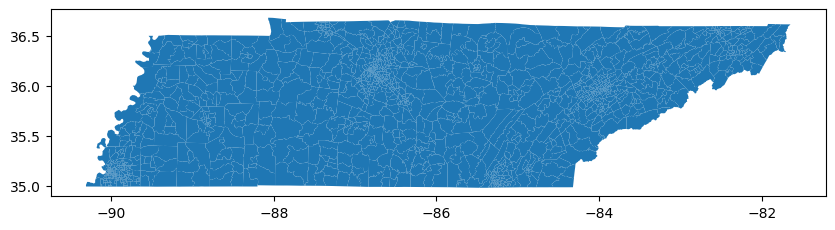

In [10]:
fig,ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax)

In [11]:
income_shp = gpd.read_file('../shape_census/acs2022_5yr_B19001_14000US47037015100.shp')

In [16]:
income_shp = income_shp.to_crs(crs_to_use)

In [12]:
income_shp

,geoid,name,B19001001,B19001001e,B19001002,B19001002e,B19001003,B19001003e,B19001004,B19001004e,...,B19001013e,B19001014,B19001014e,B19001015,B19001015e,B19001016,B19001016e,B19001017,B19001017e,geometry
0,04000US47,Tennessee,2713635.0,7405.0,144639.0,2807.0,122212.0,3595.0,111419.0,2673.0,...,4514.0,257232.0,4293.0,169567.0,3100.0,182209.0,3522.0,197980.0,3847.0,"POLYGON ((-83.98762 36.58947, -83.98724 36.589..."
1,14000US47001020100,"Census Tract 201, Anderson, TN",1531.0,225.0,156.0,90.0,74.0,52.0,41.0,42.0,...,53.0,125.0,79.0,16.0,18.0,46.0,33.0,11.0,16.0,"POLYGON ((-84.32016 35.99186, -84.32008 35.991..."
2,14000US47001020201,"Census Tract 202.01, Anderson, TN",2029.0,160.0,93.0,73.0,28.0,35.0,26.0,30.0,...,73.0,242.0,94.0,195.0,114.0,256.0,81.0,368.0,140.0,"POLYGON ((-84.24333 36.00161, -84.24330 36.001..."
3,14000US47001020202,"Census Tract 202.02, Anderson, TN",1951.0,235.0,235.0,127.0,159.0,126.0,7.0,13.0,...,97.0,134.0,77.0,129.0,106.0,295.0,146.0,122.0,67.0,"POLYGON ((-84.25132 36.00539, -84.25124 36.005..."
4,14000US47001020300,"Census Tract 203, Anderson, TN",1567.0,154.0,25.0,26.0,95.0,59.0,56.0,36.0,...,85.0,174.0,70.0,106.0,61.0,93.0,59.0,43.0,38.0,"POLYGON ((-84.24401 36.04229, -84.24090 36.044..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,14000US47189030905,"Census Tract 309.05, Wilson, TN",1925.0,288.0,38.0,64.0,0.0,19.0,0.0,19.0,...,268.0,254.0,100.0,326.0,129.0,297.0,99.0,249.0,129.0,"POLYGON ((-86.50228 36.09179, -86.50226 36.091..."
1698,14000US47189030906,"Census Tract 309.06, Wilson, TN",1963.0,244.0,0.0,19.0,21.0,35.0,17.0,30.0,...,163.0,142.0,131.0,209.0,102.0,164.0,129.0,486.0,161.0,"POLYGON ((-86.56794 36.16886, -86.56778 36.168..."
1699,14000US47189030907,"Census Tract 309.07, Wilson, TN",2513.0,276.0,109.0,89.0,60.0,58.0,59.0,68.0,...,251.0,304.0,114.0,130.0,67.0,330.0,144.0,162.0,90.0,"POLYGON ((-86.49634 36.14941, -86.49633 36.149..."
1700,14000US47189030908,"Census Tract 309.08, Wilson, TN",3124.0,432.0,133.0,92.0,61.0,102.0,46.0,52.0,...,182.0,566.0,249.0,279.0,167.0,510.0,235.0,421.0,259.0,"POLYGON ((-86.51625 36.15402, -86.51621 36.154..."


In [17]:
# tn_tract_shapes = income_shp.crs
# income_shp.plot()
# plt.show()

In [18]:
# fig,ax = plt.subplots(figsize=(10,10))
# income_shp.plot(ax=ax)

<Axes: >

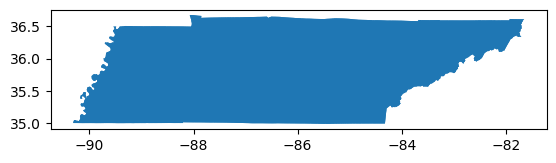

In [19]:
income_shp.plot()

In [20]:
tracts_shp = income_shp[income_shp['name']!='Tennessee']

<Axes: >

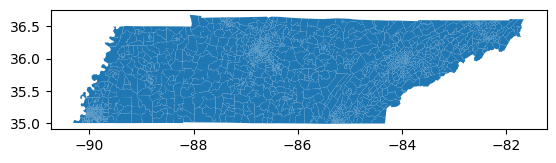

In [21]:
tracts_shp.plot()

In [15]:
pd.set_option('display.max_columns',None)
